In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score


In [33]:
results_dir = Path("../results")

simple_metrics = pd.read_csv(results_dir / 'simple_metrics.csv')
standard_metrics = pd.read_csv(results_dir / 'standard_metrics.csv')
advanced_metrics = pd.read_csv(results_dir / 'advanced_metrics.csv')

print(f'Simple: \n{simple_metrics}\n'
      f'\nStandard: \n{standard_metrics}\n'
      f'\nAdvanced: \n{advanced_metrics}\n')

Simple: 
  model  accuracy  precision    recall        f1   roc_auc
0   Ada  0.860360   0.844037  0.867925  0.855814  0.934613
1    GB  0.855856   0.836364  0.867925  0.851852  0.932498
2   KNN  0.693694   0.658333  0.745283  0.699115  0.767689
3    LR  0.869369   0.853211  0.877358  0.865116  0.931522
4    RF  0.864865   0.833333  0.896226  0.863636  0.940306
5   SVM  0.860360   0.826087  0.896226  0.859729  0.925098

Standard: 
  model  accuracy  precision    recall        f1   roc_auc
0   Ada  0.843602   0.817308  0.858586  0.837438  0.910038
1    GB  0.815166   0.819149  0.777778  0.797927  0.907107
2   KNN  0.853081   0.826923  0.868687  0.847291  0.917118
3    LR  0.876777   0.876289  0.858586  0.867347  0.931006
4    RF  0.857820   0.848485  0.848485  0.848485  0.920094
5   SVM  0.838863   0.828283  0.828283  0.828283  0.919282

Advanced: 
  model  accuracy  precision    recall        f1   roc_auc
0   Ada  0.860870   0.907407  0.816667  0.859649  0.935341
1    GB  0.856522   0.8

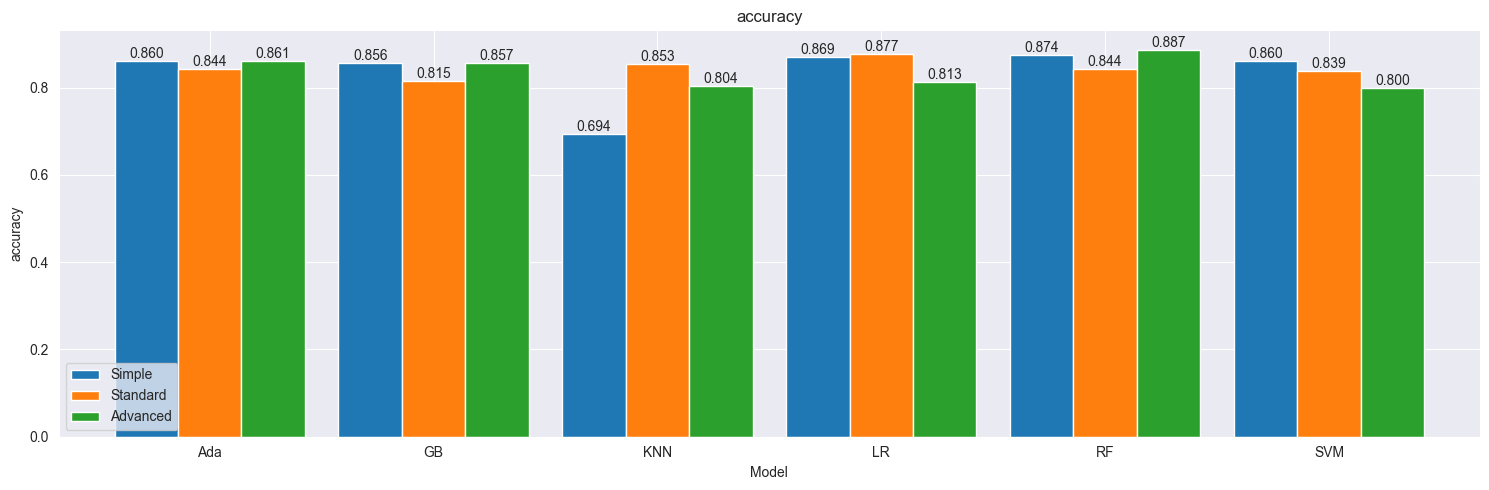

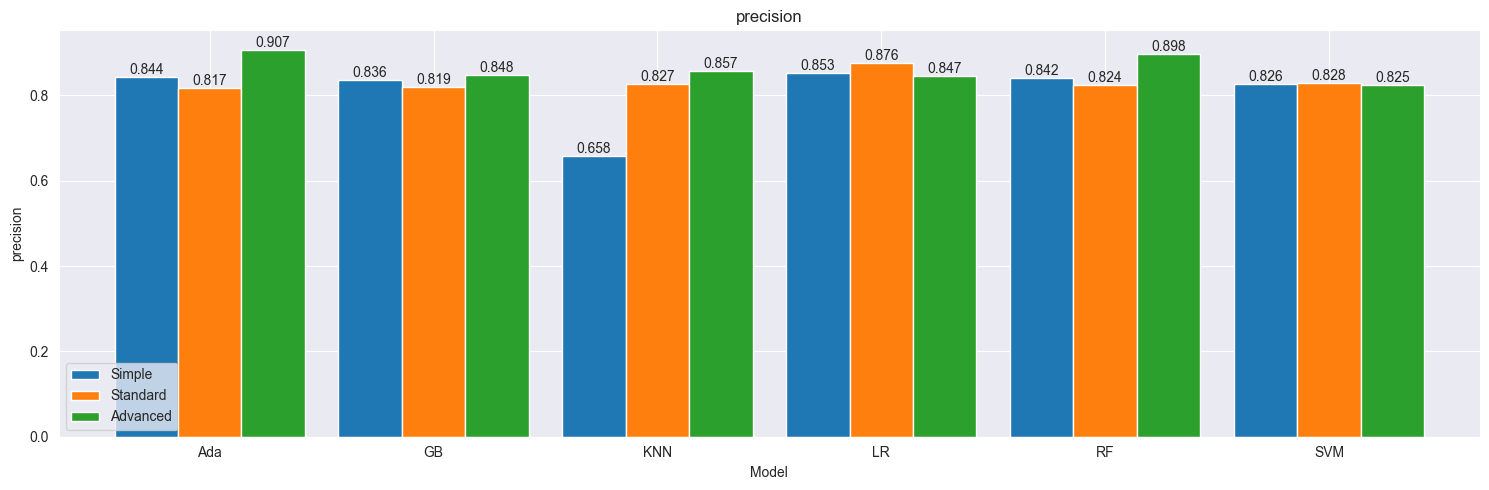

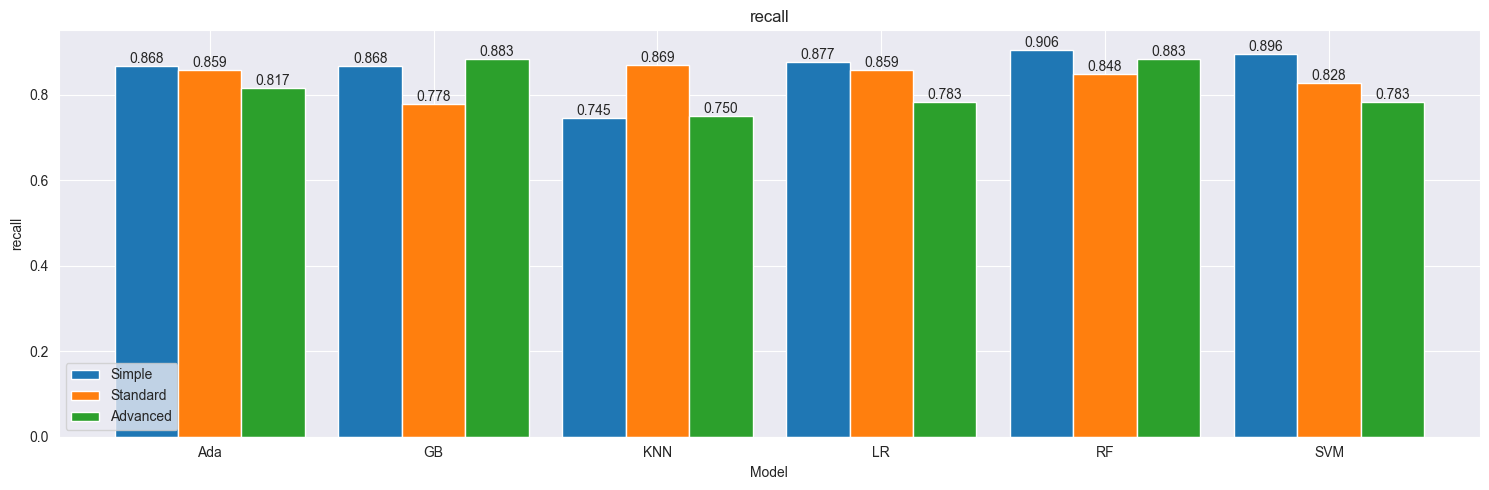

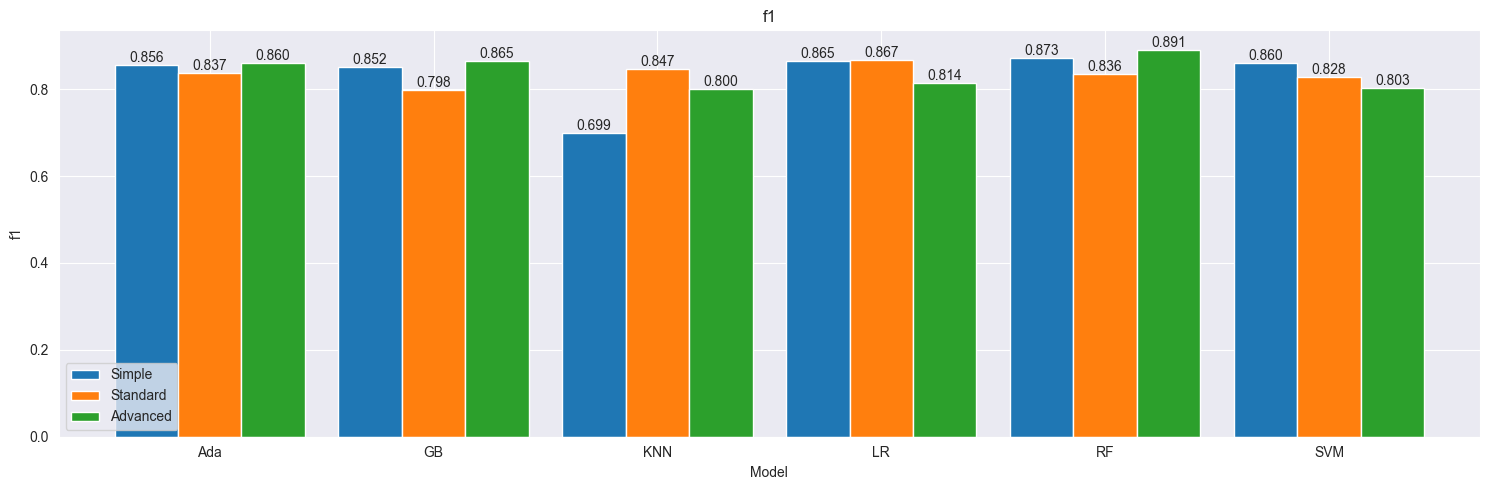

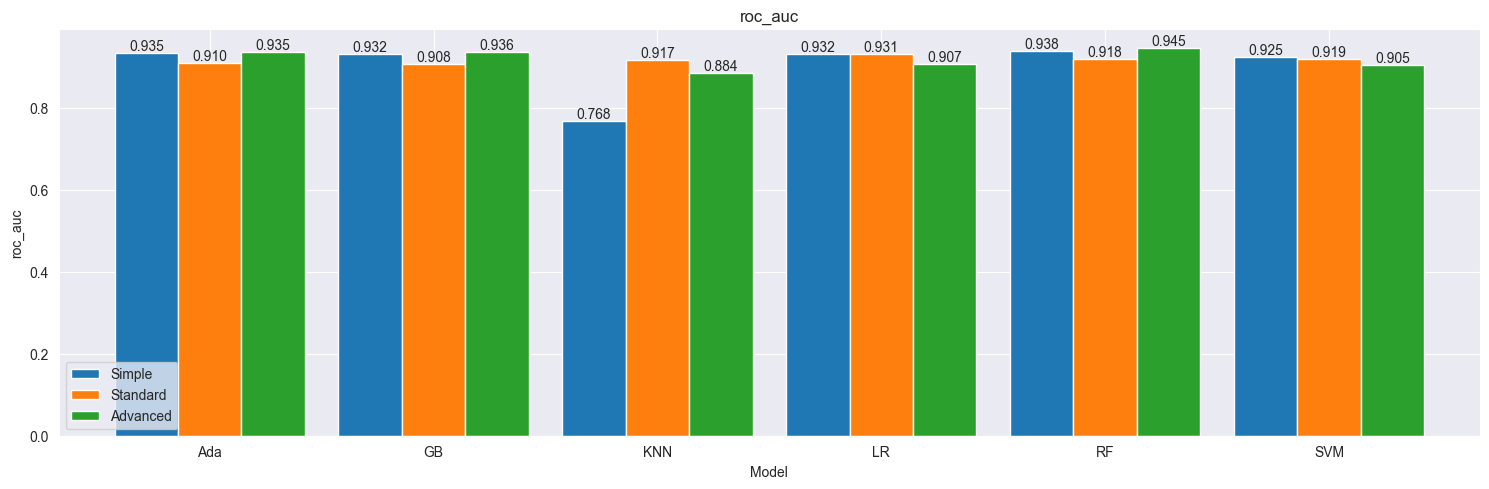

In [24]:
metrics = simple_metrics.columns.drop('model')


for metric in metrics:
    comparison = pd.DataFrame({
        'Model': simple_metrics['model'],
        'Simple': simple_metrics[metric],
        'Standard': standard_metrics[metric],
        'Advanced': advanced_metrics[metric]
    })

    comparison.set_index('Model', inplace=True)

    ax = comparison.plot(
        kind='bar',
        figsize=(15, 5),
        title=metric,
        width=0.85
    )

    ax.set_ylabel(metric)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f')

    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [46]:
results_dir = Path("../results")
splits_dir = Path("../data/splits")

preprocessing_types = ['simple', 'standard', 'advanced']

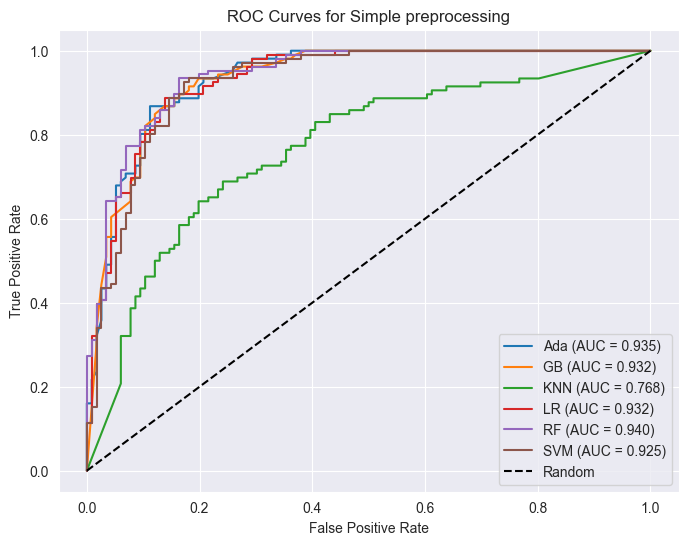

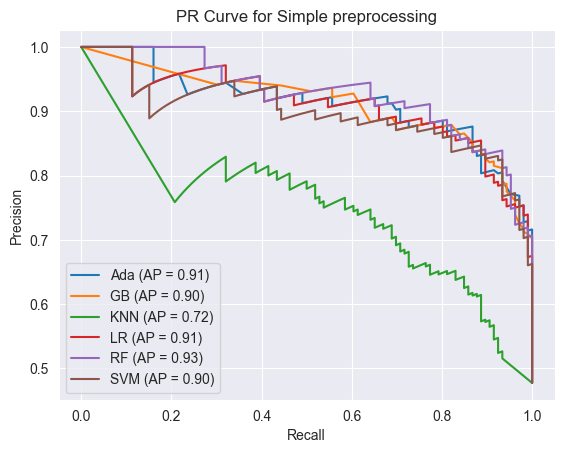

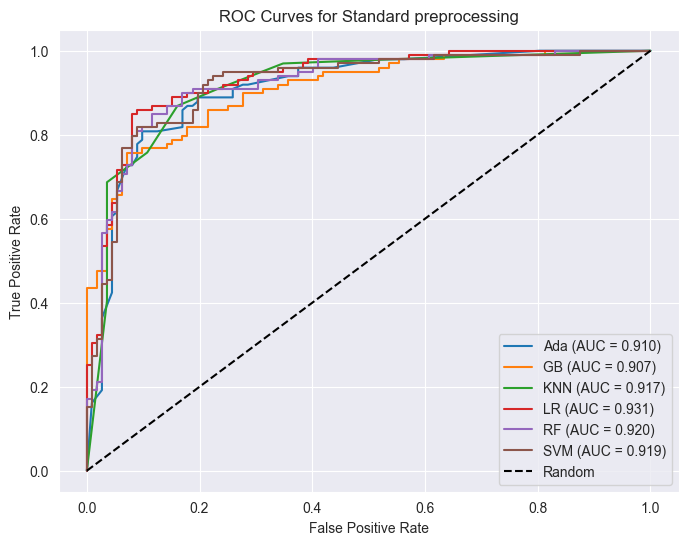

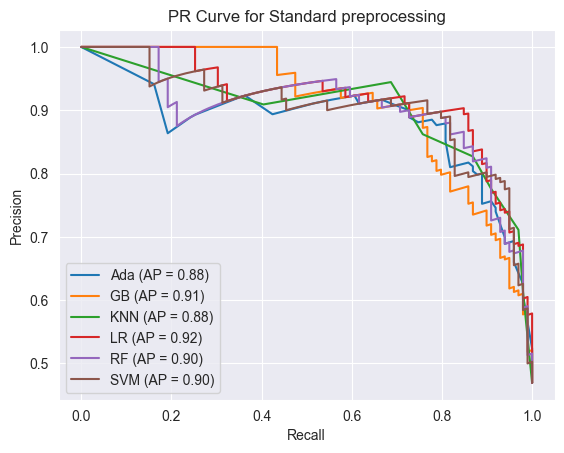

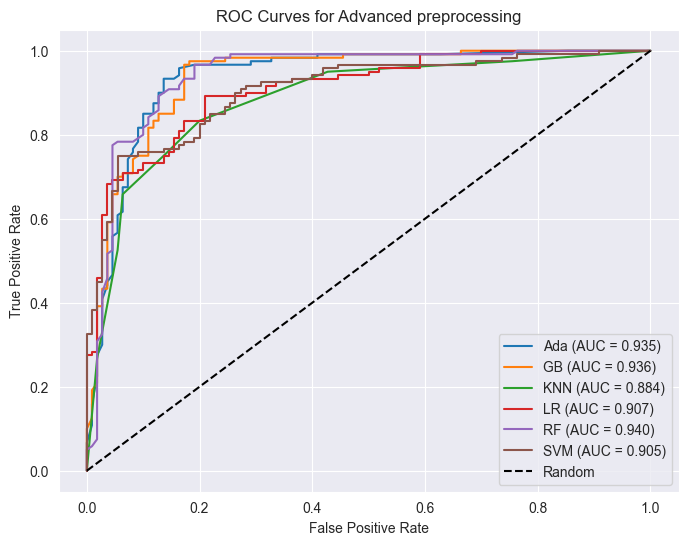

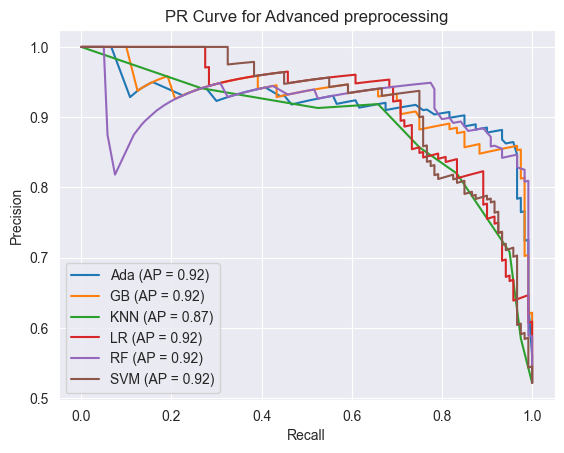

In [51]:
for prep in preprocessing_types:
    score_file = Path(results_dir / f'{prep}_y_scores.npy')

    y_scores = np.load(score_file, allow_pickle=True).item()
    y_test = pd.read_csv(splits_dir / f'{prep}_y_test.csv').values.ravel()

    plt.figure(figsize=(8,6))

    for model_name, y_score in y_scores.items():
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")

    plt.plot([0,1], [0,1], 'k--', label="Random")

    plt.title(f"ROC Curves for {prep.capitalize()} preprocessing")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    for model_name, y_score in y_scores.items():
        precision, recall, thresholds = precision_recall_curve(y_test, y_score)
        ap = average_precision_score(y_test, y_score)
        plt.plot(recall, precision, label=f"{model_name} (AP = {ap:.2f})")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR Curve for {prep.capitalize()} preprocessing")
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()